# Resolución de Sistemas de Ecuaciones Diferenciales Ordinarias Lineales con Python

## 2. Fundamentos Matemáticos

### 2.1 Representación de Sistemas de EDOs Lineales

Un sistema de EDOs lineales se puede representar de la siguiente forma:

$$
\frac{d\mathbf{X}}{dt} = \mathbf{A} \mathbf{X} + \mathbf{B}
$$

Donde:

- $\mathbf{X}$ es un vector de variables dependientes.
- $\mathbf{A}$ es una matriz de coeficientes.
- $\mathbf{B}$ es un vector de constantes o funciones de $t$.

### 2.2 Sistemas Homogéneos y No Homogéneos

- **Sistema Homogéneo:** $\mathbf{B} = \mathbf{0}$
- **Sistema No Homogéneo:** $\mathbf{B} \neq \mathbf{0}$

### 2.3 Valores y Vectores Propios

Para sistemas homogéneos, las soluciones se pueden expresar utilizando los valores y vectores propios de la matriz $\mathbf{A}$.

---

**Solución General:**

$$
\mathbf{X}(t) = \sum_{i} c_i \mathbf{v}_i e^{\lambda_i t}
$$

Donde:

- $\lambda_i$ son los valores propios.
- $\mathbf{v}_i$ son los vectores propios correspondientes.
- $c_i$ son constantes determinadas por las condiciones iniciales.


## 3. Solución Analítica de Sistemas Homogéneos

Consideremos un ejemplo simple para ilustrar la solución analítica de un sistema homogéneo.

### Ejemplo 1: Sistema de Dos EDOs Acopladas

Considera el sistema:

$$
\begin{cases}
\frac{dx}{dt} = 3x + 4y \\
\frac{dy}{dt} = -4x + 3y
\end{cases}
$$

Podemos escribir esto en forma matricial:

$$
\frac{d}{dt}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
3 & 4 \\
-4 & 3
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

Vamos a resolver este sistema analíticamente.

In [1]:
import numpy as np

# Definir la matriz A
A = np.array([[3, 4],
              [-4, 3]])

# Calcular valores y vectores propios
valores_propios, vectores_propios = np.linalg.eig(A)

print("Valores propios:", valores_propios)
print("Vectores propios:")
print(vectores_propios)


Valores propios: [3.+4.j 3.-4.j]
Vectores propios:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


**Interpretación:**

- Los valores propios son conjugados complejos: $ \lambda = 3 \pm 4i $
- El sistema exhibe un comportamiento oscilatorio con crecimiento exponencial debido a la parte real positiva.

**Solución General:**

$$
\begin{bmatrix}
x(t) \\
y(t)
\end{bmatrix}
= c_1 e^{(3 + 4i)t} \mathbf{v}_1 + c_2 e^{(3 - 4i)t} \mathbf{v}_2
$$

Donde $ \mathbf{v}_1 $ y $ \mathbf{v}_2 $ son los vectores propios.

---

Dado que los valores propios son complejos, podemos expresar la solución en términos de funciones reales utilizando la fórmula de Euler.

---

**Solución Final:**

$$
\begin{cases}
x(t) = e^{3t} [A \cos(4t) + B \sin(4t)] \\
y(t) = e^{3t} [C \cos(4t) + D \sin(4t)]
\end{cases}
$$

Las constantes $ A, B, C, D $ se determinan a partir de las condiciones iniciales.


## 4. Métodos Numéricos de Solución

Las soluciones analíticas pueden no ser siempre posibles, especialmente para sistemas complejos o no lineales. Los métodos numéricos proporcionan soluciones aproximadas.

### 4.1 Método de Euler para Sistemas

El método de Euler se puede extender a sistemas actualizando cada variable en cada paso de tiempo.

**Fórmula del Método de Euler:**

$$
\mathbf{X}_{n+1} = \mathbf{X}_n + h \cdot \mathbf{f}(t_n, \mathbf{X}_n)
$$

Donde:

- $ h $ es el tamaño del paso de tiempo.
- $ \mathbf{f}(t, \mathbf{X}) = \frac{d\mathbf{X}}{dt} $

### 4.2 Métodos de Runge-Kutta

Métodos de orden superior como Runge-Kutta proporcionan mejor precisión.

Usaremos la biblioteca SciPy de Python que implementa métodos avanzados de Runge-Kutta.


## 5. Resolución de Sistemas con SciPy

La función `solve_ivp` de SciPy es una herramienta versátil para resolver EDOs numéricamente.

### 5.1 Uso de `solve_ivp` en Nuestro Ejemplo

Vamos a resolver el sistema anterior numéricamente utilizando SciPy.


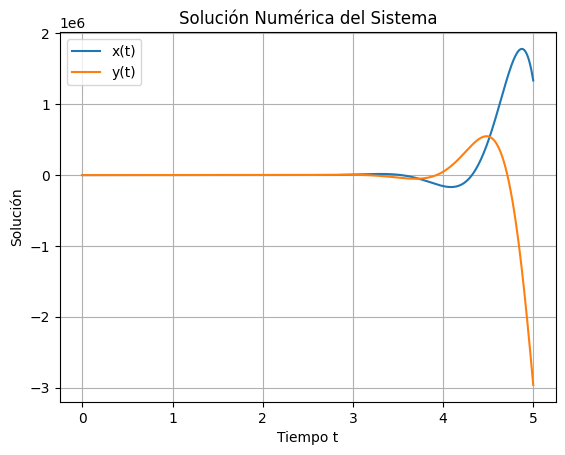

In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones
def sistema(t, X):
    x, y = X
    dxdt = 3*x + 4*y
    dydt = -4*x + 3*y
    return [dxdt, dydt]

# Definir el intervalo de tiempo y condiciones iniciales
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 500)
X0 = [1, 0]  # Condiciones iniciales x(0)=1, y(0)=0

# Resolver el sistema
sol = solve_ivp(sistema, t_span, X0, t_eval=t_eval)

# Graficar las soluciones
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='y(t)')
plt.xlabel('Tiempo t')
plt.ylabel('Solución')
plt.legend()
plt.title('Solución Numérica del Sistema')
plt.grid(True)
plt.show()


**Interpretación:**

La gráfica muestra la solución numérica de $ x(t) $ y $ y(t) $ en función del tiempo. Las soluciones exhiben un comportamiento oscilatorio y crecimiento exponencial, consistente con nuestros hallazgos analíticos.


## 6. Aplicaciones en Ingeniería

### 6.1 Sistema Mecánico: Sistema Masa-Resorte Acoplado

Considera dos masas conectadas por resortes. Las ecuaciones de movimiento pueden expresarse como:

$$
\begin{cases}
m_1 \frac{d^2 x_1}{dt^2} = -k_1 x_1 + k_2 (x_2 - x_1) \\
m_2 \frac{d^2 x_2}{dt^2} = -k_2 (x_2 - x_1)
\end{cases}
$$

Asumiendo $ m_1 = m_2 = m $ y reordenando, podemos convertir las EDOs de segundo orden en un sistema de EDOs de primer orden.

### 6.2 Conversión a Sistema de Primer Orden

Sea:

$$
\begin{cases}
v_1 = \frac{dx_1}{dt} \\
v_2 = \frac{dx_2}{dt}
\end{cases}
$$

Entonces el sistema se convierte en:

$$
\begin{cases}
\frac{dx_1}{dt} = v_1 \\
\frac{dv_1}{dt} = \frac{-k_1 x_1 + k_2 (x_2 - x_1)}{m} \\
\frac{dx_2}{dt} = v_2 \\
\frac{dv_2}{dt} = \frac{-k_2 (x_2 - x_1)}{m}
\end{cases}
$$


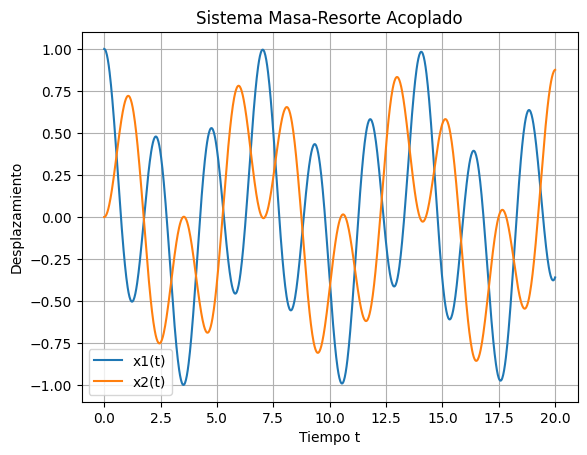

In [3]:
# Parámetros
m = 1.0  # masa
k1 = 2.0  # constante del resorte
k2 = 3.0  # constante del resorte

# Definir el sistema
def masa_resorte_acoplado(t, Y):
    x1, v1, x2, v2 = Y
    dx1dt = v1
    dv1dt = (-k1*x1 + k2*(x2 - x1))/m
    dx2dt = v2
    dv2dt = (-k2*(x2 - x1))/m
    return [dx1dt, dv1dt, dx2dt, dv2dt]

# Condiciones iniciales
Y0 = [1.0, 0.0, 0.0, 0.0]  # x1(0), v1(0), x2(0), v2(0)

# Intervalo de tiempo
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver el sistema
sol = solve_ivp(masa_resorte_acoplado, t_span, Y0, t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='x1(t)')
plt.plot(sol.t, sol.y[2], label='x2(t)')
plt.xlabel('Tiempo t')
plt.ylabel('Desplazamiento')
plt.legend()
plt.title('Sistema Masa-Resorte Acoplado')
plt.grid(True)
plt.show()


**Interpretación:**

La gráfica muestra los desplazamientos $ x_1(t) $ y $ x_2(t) $ de las dos masas en función del tiempo. El sistema exhibe oscilaciones acopladas debido a la interacción entre las masas y los resortes.


## 7. Análisis de Estabilidad

### 7.1 Análisis de Planos Fase

Podemos analizar la estabilidad del sistema examinando los valores propios de la matriz o graficando el plano fase.

---

**Ejemplo:**

Revisemos el primer ejemplo y grafiquemos la trayectoria en el plano fase.


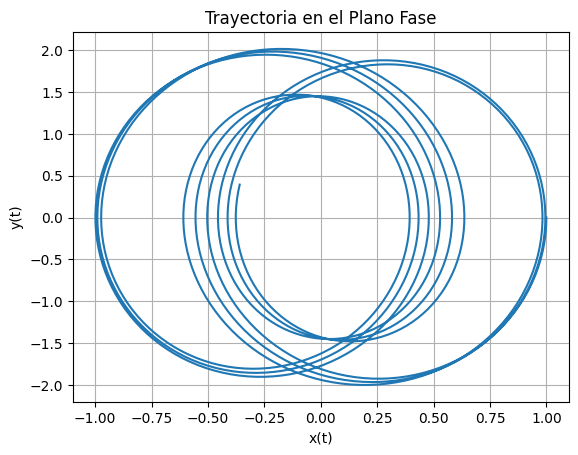

In [4]:
# Graficar la trayectoria en el plano fase
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trayectoria en el Plano Fase')
plt.grid(True)
plt.show()


**Interpretación:**

La gráfica del plano fase ilustra la trayectoria del sistema en el espacio de estados. El patrón en espiral indica un comportamiento oscilatorio con crecimiento, consistente con la parte real positiva de los valores propios.
